**Library Import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import math
from sklearn import linear_model
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive/')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/Shared drives/DATASCI (S11)/Final Project/VGS_data.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Potential Research Questions:
1. How do the critic scores affect the sales? 
2. How does the number of platforms the publisher publishes on affect their sales? 
3. How does the number of titles the publisher publishes affect their sales?
4. What is the best selling Platform in each Region?
5. What is the best selling Genre in each Region?

**Main Code**

# Data Cleaning

In [ ]:
data = data.drop(['Year_of_Release', 'Developer', 'Rating', 'User_Score', 'User_Count'], axis=1)
data.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN


In [ ]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
data = data.fillna(data.mean())
data.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821


In [ ]:
data['Critic_Count'] = data['Critic_Count'].round(decimals=0)
data.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.0
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.0
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.0
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.0


# Check data

In [ ]:
df_check = data
df_check.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.0
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.0
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.0
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.0


In [ ]:
df_check1 = df_check.sort_values(by='Global_Sales', ascending=False)
df_check1.head(15)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.0
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.0
2,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.0
3,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.0
5,Tetris,GB,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,68.967679,26.0
6,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.0
7,Wii Play,Wii,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.0
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.000000,80.0
9,Duck Hunt,NES,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,68.967679,26.0


In [ ]:
df_check2 = df_check.sort_values(by='Critic_Score', ascending=False)
df_check2.head(15)

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count
51,Grand Theft Auto IV,X360,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,98.0,86.0
5350,SoulCalibur,DC,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34,98.0,24.0
57,Grand Theft Auto IV,PS3,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50,98.0,64.0
227,Tony Hawk's Pro Skater 2,PS,Sports,Activision,3.05,1.41,0.02,0.20,4.68,98.0,19.0
16,Grand Theft Auto V,PS3,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0
97,Super Mario Galaxy 2,Wii,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0
517,Metroid Prime,GC,Shooter,Nintendo,1.96,0.67,0.10,0.09,2.82,97.0,70.0
129,Halo: Combat Evolved,XB,Shooter,Microsoft Game Studios,4.98,1.30,0.08,0.07,6.43,97.0,68.0
249,Tony Hawk's Pro Skater 3,PS2,Sports,Activision,2.66,1.29,0.01,0.46,4.41,97.0,34.0
49,Super Mario Galaxy,Wii,Platform,Nintendo,6.06,3.35,1.20,0.74,11.35,97.0,73.0


# How do the critic scores affect the sales?

Text(0, 0.5, 'Global_Sales')

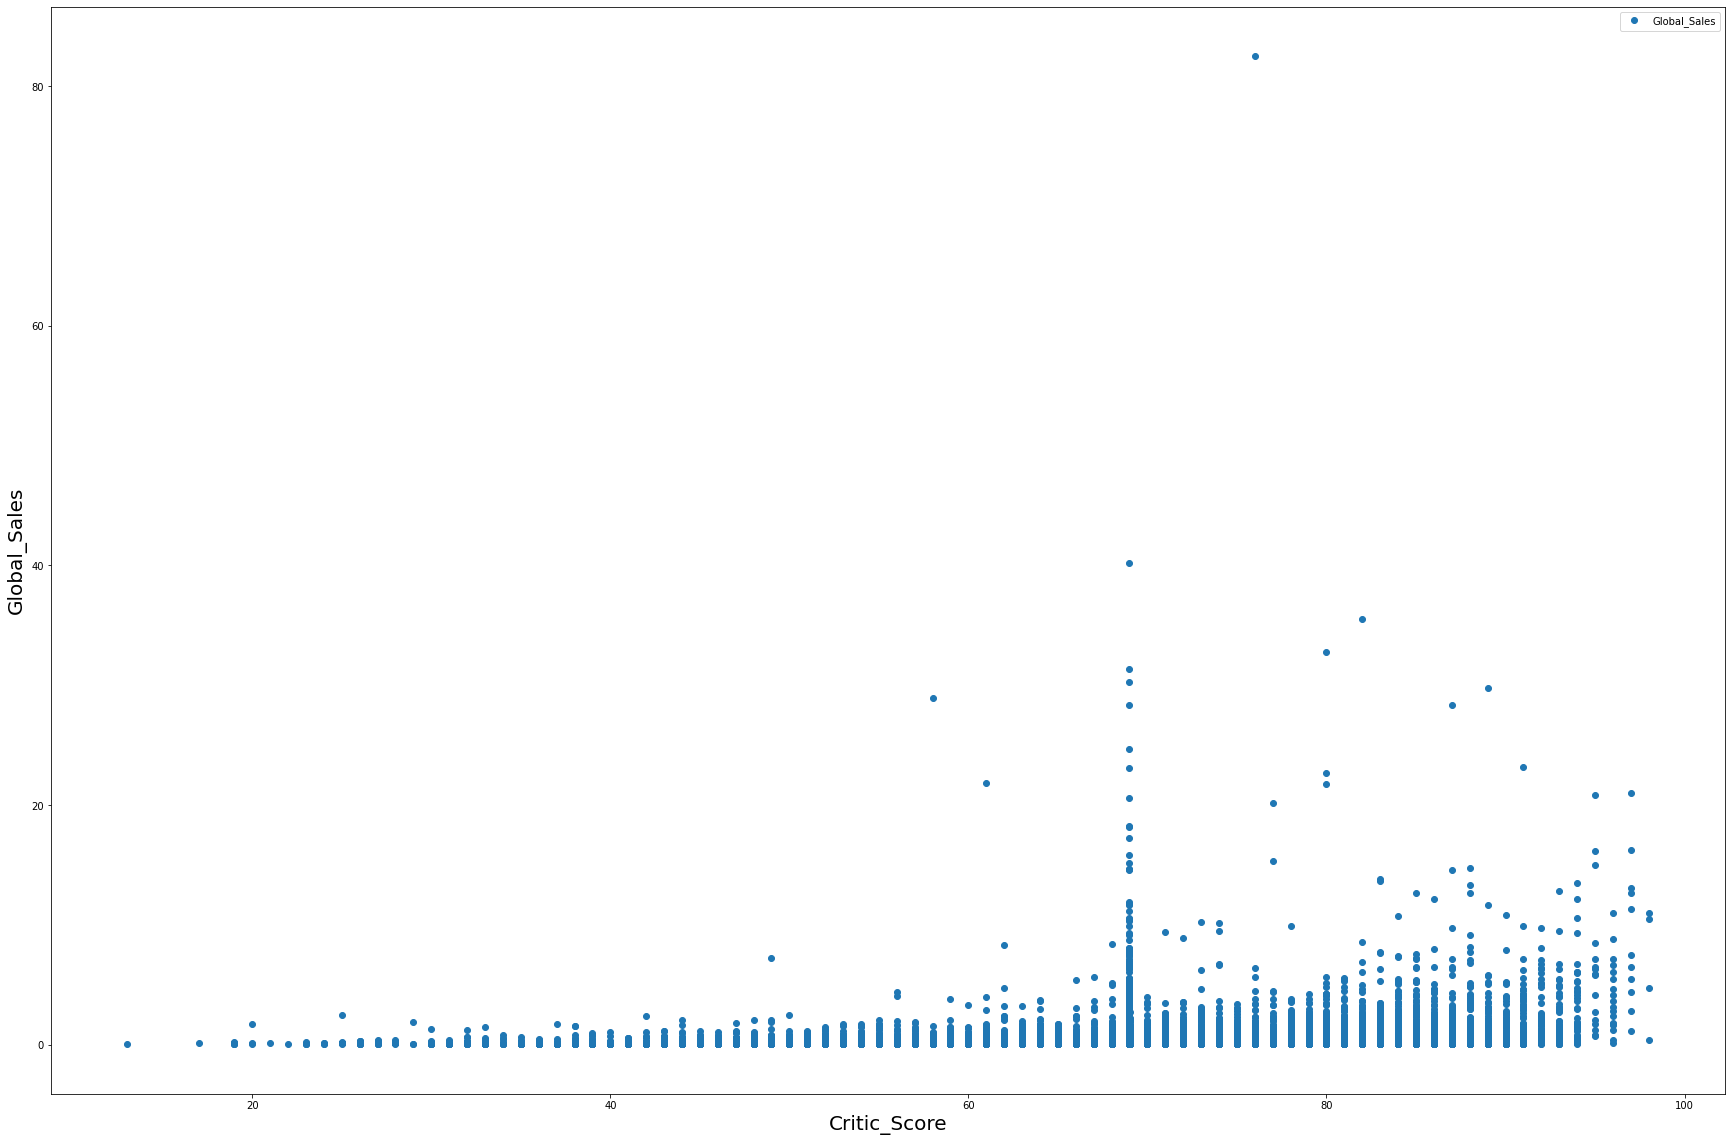

In [ ]:
# Plot the two variable that intuitively should have an obvious correlation
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

data.plot(ax=ax, x='Critic_Score', y='Global_Sales', style='o')
plt.xlabel('Critic_Score', fontsize=20)
plt.ylabel('Global_Sales', fontsize=20)

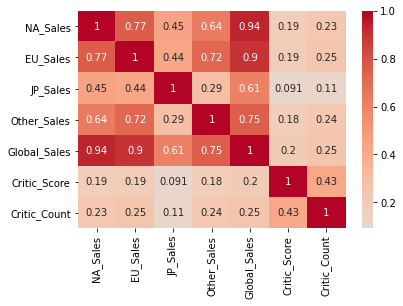

In [ ]:
# Get correlation between numerical values
# The middle value, 0, is represented with white.
# The higher the value, the more positively correlated two variables are.
# The higher the value the redder the cell becomes.
sns.heatmap(data.corr(), center=0, annot = True, fmt='.2g',cmap= 'coolwarm')

# How does the number of platforms the publisher publishes on affect their sales?

In [ ]:
# number_of_platforms_by_publisher counts the number of unique platforms the publisher published on
number_of_platforms_by_publisher = data.groupby('Publisher')['Platform'].nunique().reset_index(name='Number of Platforms by Publisher')
number_of_platforms_by_publisher.sort_values(by='Number of Platforms by Publisher')

,Publisher,Number of Platforms by Publisher
156,Extreme Entertainment Group,1
397,Phenomedia,1
205,Graphsim Entertainment,1
204,Grand Prix Games,1
398,Phoenix Games,1
...,...,...
21,Activision,20
448,Sega,21
85,Capcom,23
349,Namco Bandai Games,23


In [ ]:
# global_sales_by_publisher is the sum of all the sold units of games published by the publisher.
global_sales_by_publisher = data.groupby('Publisher')['Global_Sales'].sum().reset_index(name='Sum of Global Sales by Publisher')
global_sales_by_publisher.sort_values(by='Sum of Global Sales by Publisher')

,Publisher,Sum of Global Sales by Publisher
321,Michaelsoft,0.01
379,Otomate,0.01
527,UIG Entertainment,0.01
391,Paradox Development,0.01
498,Takuyo,0.01
...,...,...
528,Ubisoft,471.61
458,Sony Computer Entertainment,606.48
21,Activision,731.16
139,Electronic Arts,1116.96


In [ ]:
# Create a new dataframe with publisher, number_of_platforms_by_publisher, and global_sales_by_publisher
# and sort by number of platforms by publisher.
df = number_of_platforms_by_publisher.join(global_sales_by_publisher['Sum of Global Sales by Publisher'])
df.sort_values(by='Number of Platforms by Publisher')

,Publisher,Number of Platforms by Publisher,Sum of Global Sales by Publisher
156,Extreme Entertainment Group,1,0.03
397,Phenomedia,1,0.18
205,Graphsim Entertainment,1,0.02
204,Grand Prix Games,1,0.06
398,Phoenix Games,1,0.02
...,...,...,...
21,Activision,20,731.16
448,Sega,21,270.35
85,Capcom,23,200.02
349,Namco Bandai Games,23,254.62


Text(0, 0.5, 'Sum of Global Sales by Publisher')

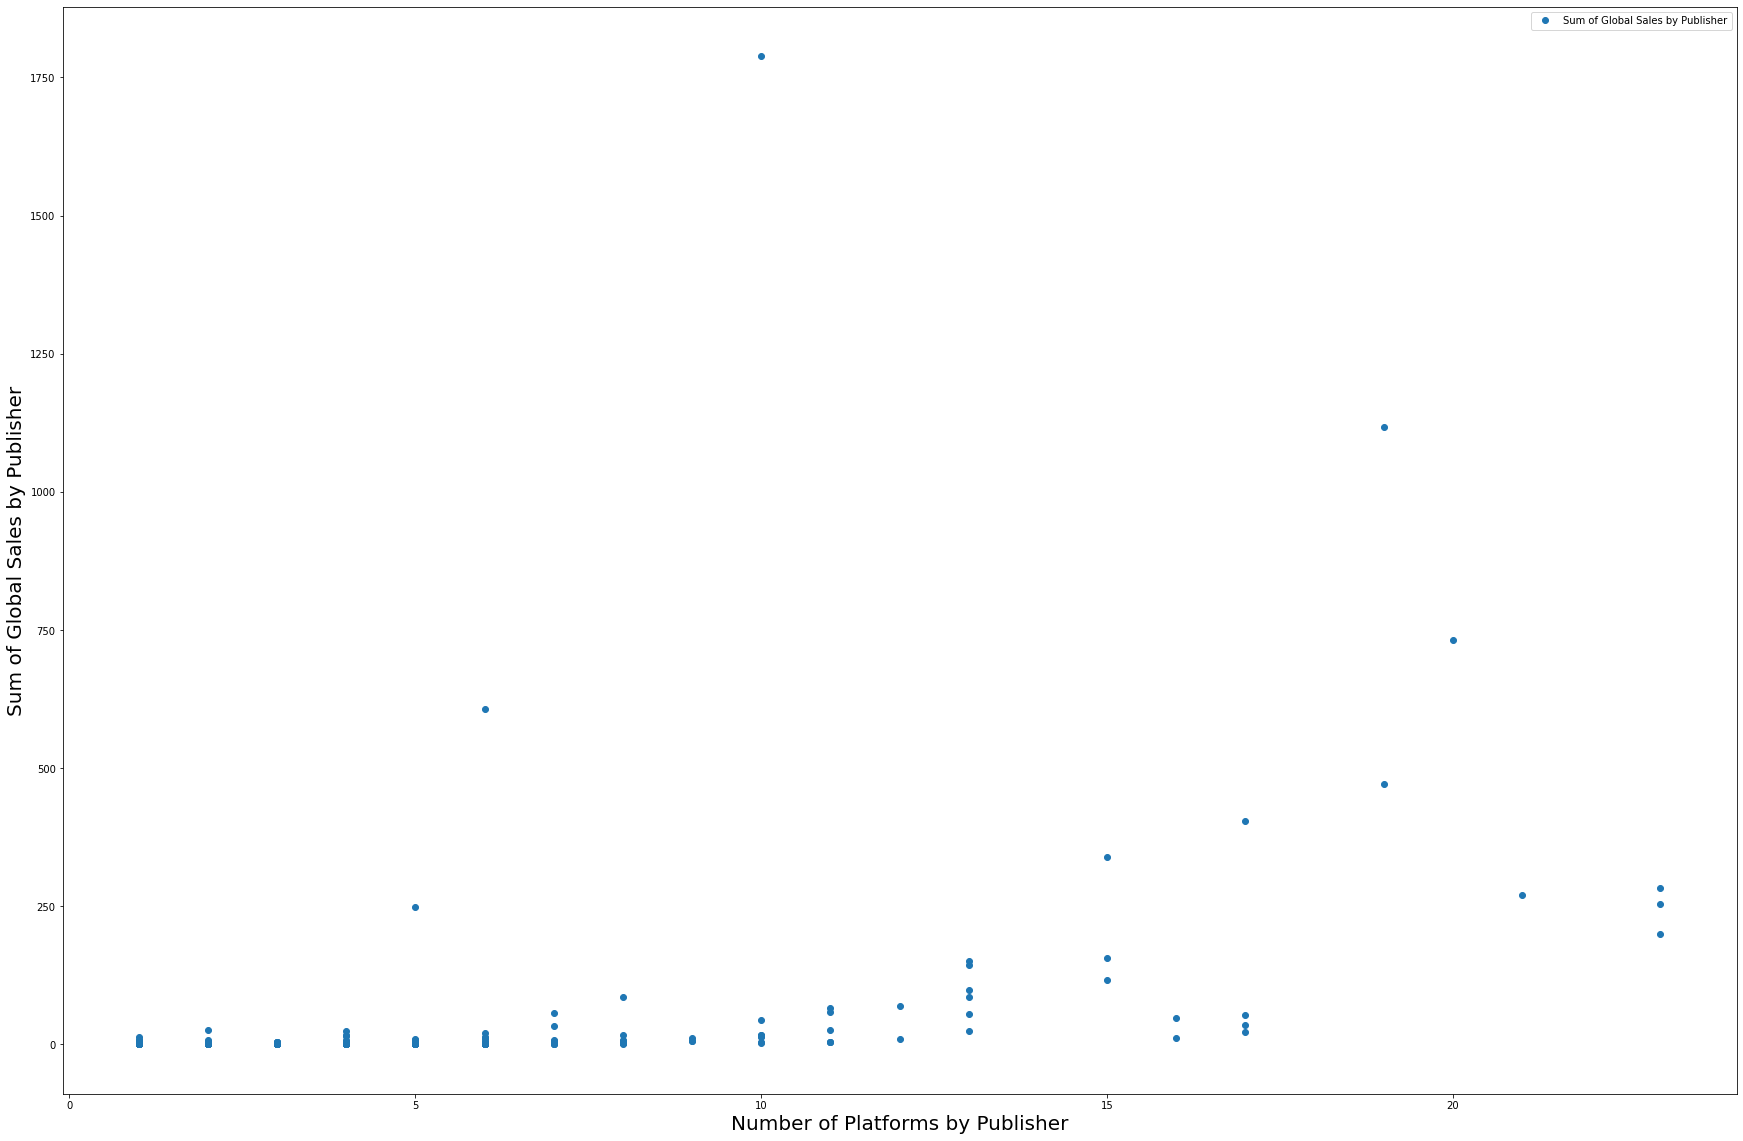

In [ ]:
# Plot the dataframe
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

df.plot(ax=ax, x='Number of Platforms by Publisher', y='Sum of Global Sales by Publisher', style='o')
plt.xlabel('Number of Platforms by Publisher', fontsize=20)
plt.ylabel('Sum of Global Sales by Publisher', fontsize=20)

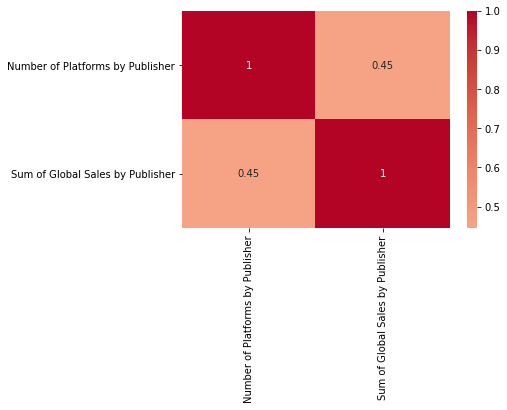

In [ ]:
# Get the correlation between number_of_platforms_by_publisher and global_sales_by_publisher
sns.heatmap(df.corr(), center=0, annot = True, fmt='.2g', cmap= 'coolwarm')

In [ ]:
# Linearize the above dataframe by taking the log of global_sales_by_publisher
linearized = df
linearized['Sum of Global Sales by Publisher'] = np.log(linearized['Sum of Global Sales by Publisher'])

Text(0, 0.5, 'Sum of Global Sales by Publisher')

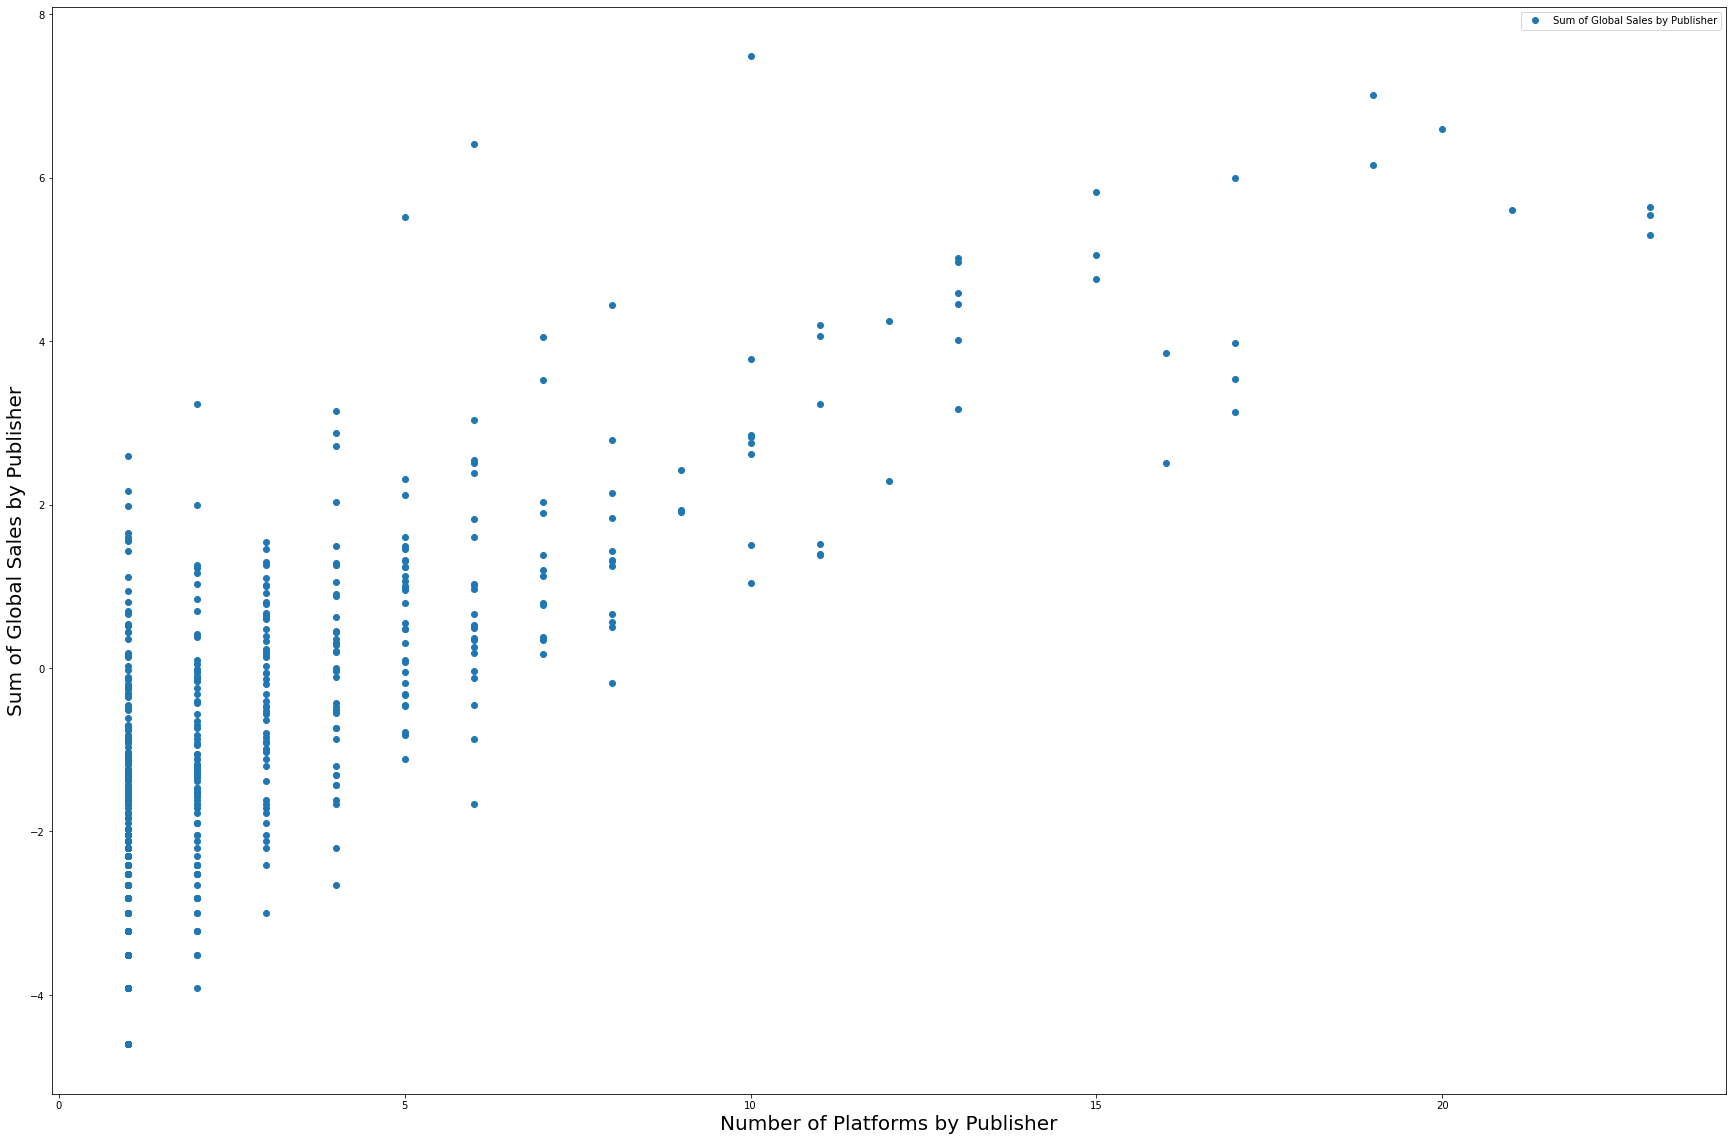

In [ ]:
# Plot the linearized dataframe
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

linearized.plot(ax=ax, x='Number of Platforms by Publisher', y='Sum of Global Sales by Publisher', style='o')
plt.xlabel('Number of Platforms by Publisher', fontsize=20)
plt.ylabel('Sum of Global Sales by Publisher', fontsize=20)

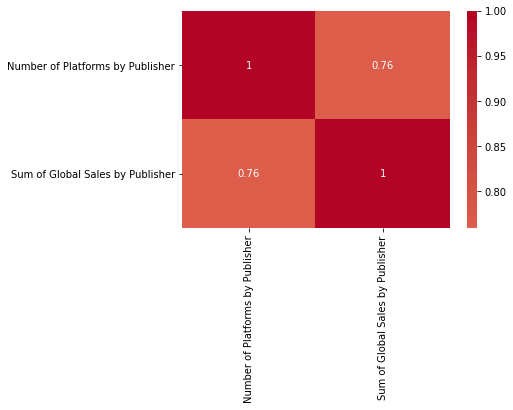

In [ ]:
# Get the correlation between number_of_platforms_by_publisher and log(global_sales_by_publisher)
sns.heatmap(linearized.corr(), center=0, annot = True, fmt='.2g',cmap= 'coolwarm')

# How does the number of titles the publisher publishes affect their sales?

In [ ]:
# number_of_titles_by_publisher counts the number of unique titles the publisher published
number_of_titles_by_publisher = data.groupby('Publisher')['Name'].nunique().reset_index(name='Number of Titles by Publisher')
number_of_titles_by_publisher.sort_values(by='Number of Titles by Publisher')

,Publisher,Number of Titles by Publisher
580,responDESIGN,1
395,Phantagram,1
394,Performance Designed Products,1
176,GOA,1
391,Paradox Development,1
...,...,...
139,Electronic Arts,608
458,Sony Computer Entertainment,627
277,Konami Digital Entertainment,641
361,Nintendo,671


In [ ]:
# Create a new dataframe with publisher, number_of_titles_by_publisher, and global_sales_by_publisher
# and sort by number of titles by publisher.
df_2 = number_of_titles_by_publisher.join(global_sales_by_publisher['Sum of Global Sales by Publisher'])
df_2.sort_values(by='Number of Titles by Publisher')

,Publisher,Number of Titles by Publisher,Sum of Global Sales by Publisher
580,responDESIGN,1,0.13
395,Phantagram,1,0.05
394,Performance Designed Products,1,0.35
176,GOA,1,0.02
391,Paradox Development,1,0.01
...,...,...,...
139,Electronic Arts,608,1116.96
458,Sony Computer Entertainment,627,606.48
277,Konami Digital Entertainment,641,282.39
361,Nintendo,671,1788.81


Text(0, 0.5, 'Sum of Global Sales by Publisher')

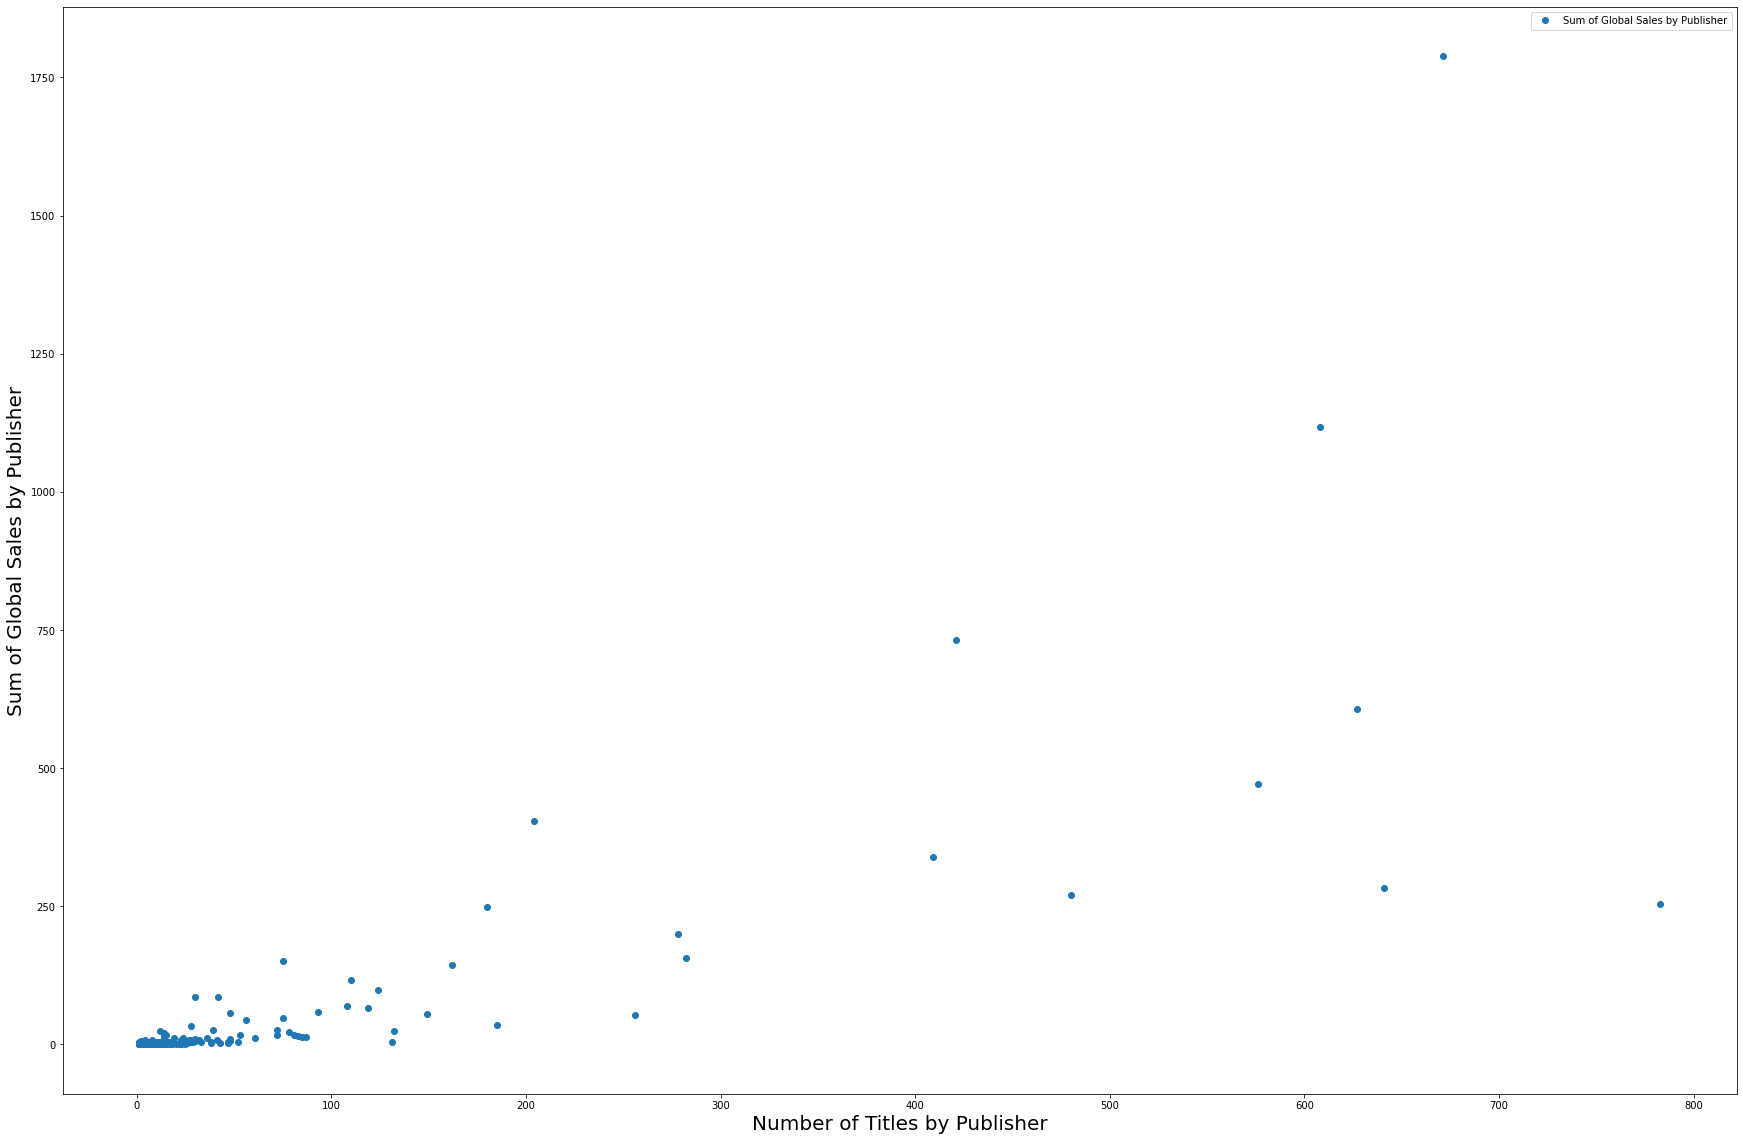

In [ ]:
# Plot the dataframe
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

df_2.plot(ax=ax, x='Number of Titles by Publisher', y='Sum of Global Sales by Publisher', style='o')
plt.xlabel('Number of Titles by Publisher', fontsize=20)
plt.ylabel('Sum of Global Sales by Publisher', fontsize=20)

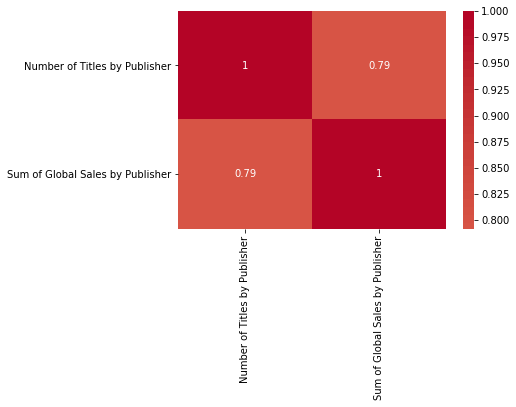

In [ ]:
# Get the correlation between number_of_titles_by_publisher and global_sales_by_publisher
sns.heatmap(df_2.corr(), center=0, annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
# Transform the above dataframe by taking the log of both variables
linearized_2 = df_2
linearized_2['Sum of Global Sales by Publisher'] = np.log(linearized_2['Sum of Global Sales by Publisher'])
linearized_2['Number of Titles by Publisher']    = np.log(linearized_2['Number of Titles by Publisher'])

Text(0, 0.5, 'Sum of Global Sales by Publisher')

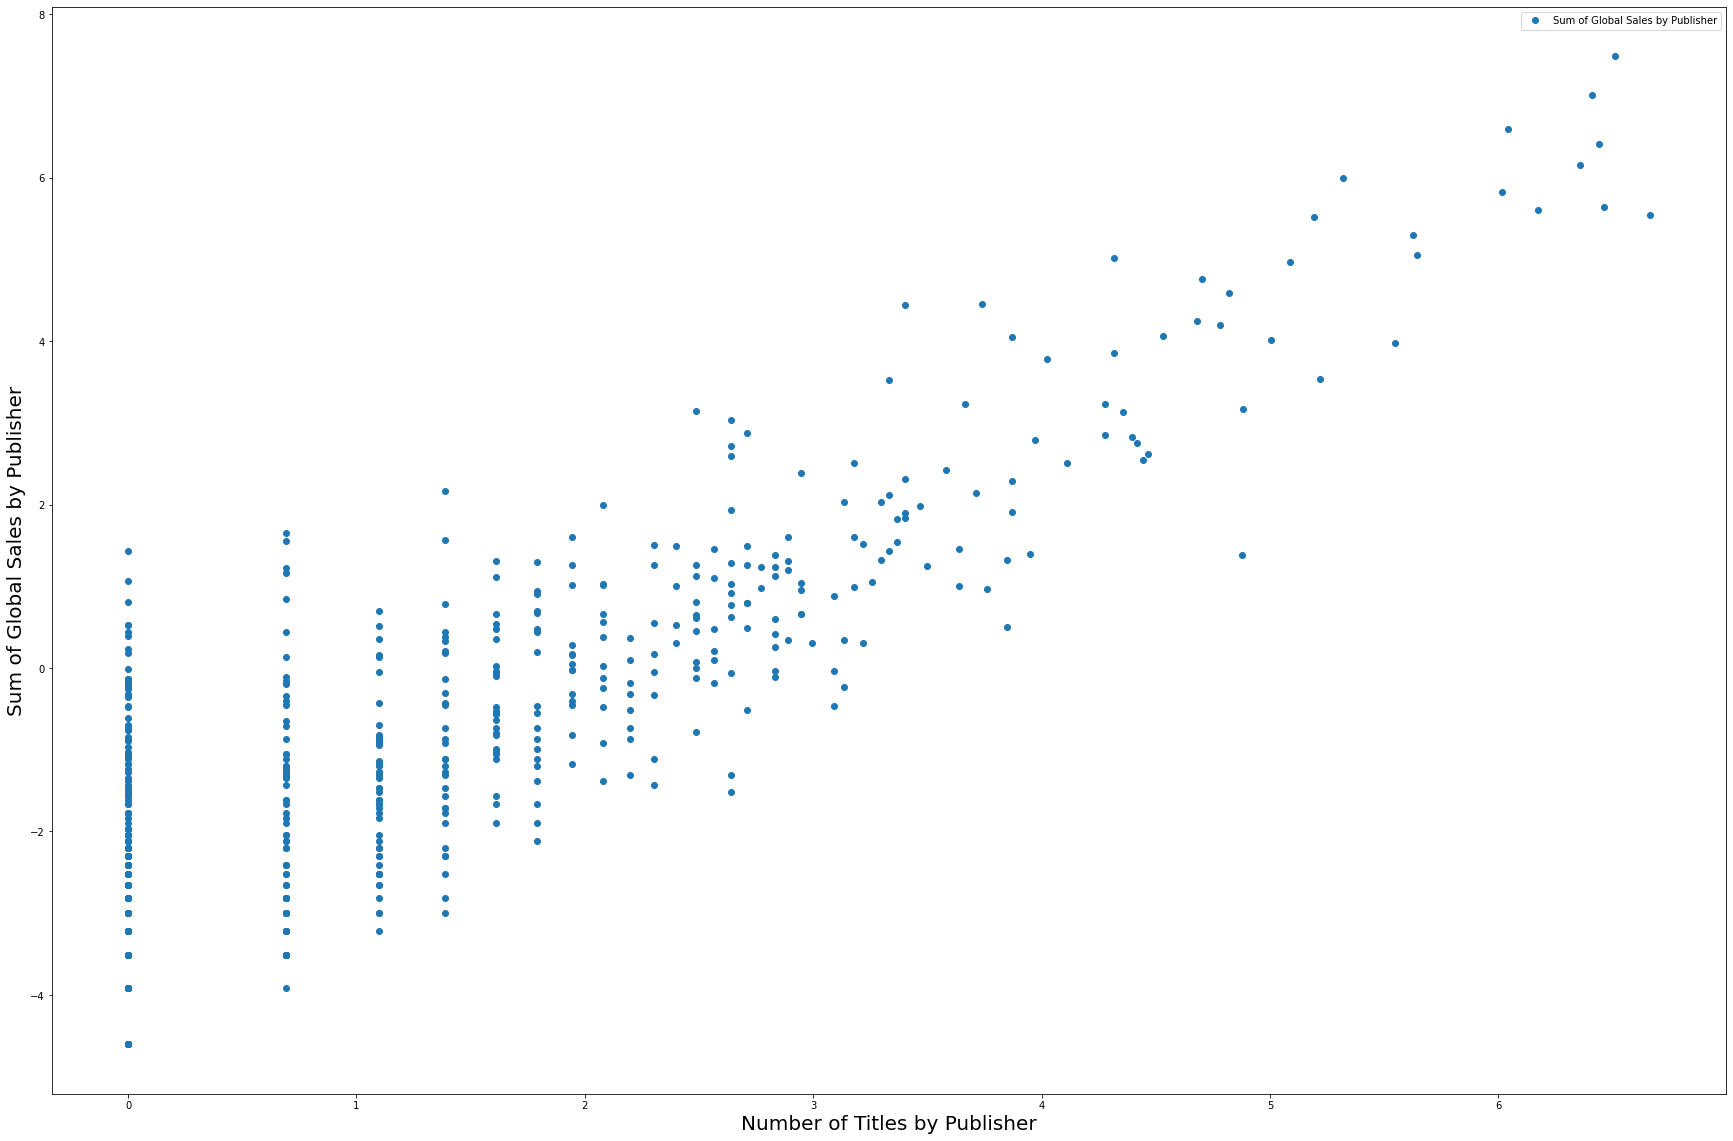

In [ ]:
# Plot the transformed dataframe.
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

linearized_2.plot(ax=ax, x='Number of Titles by Publisher', y='Sum of Global Sales by Publisher', style='o')
plt.xlabel('Number of Titles by Publisher', fontsize=20)
plt.ylabel('Sum of Global Sales by Publisher', fontsize=20)

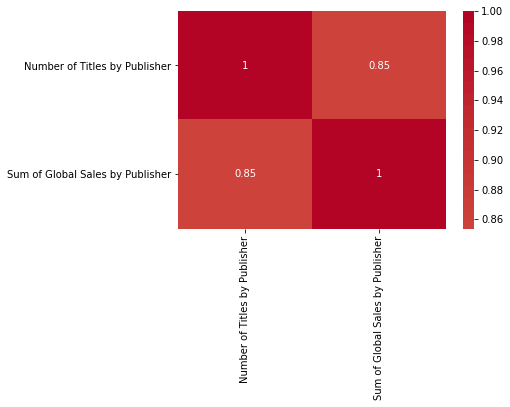

In [ ]:
# Get the correlation between the two variables
sns.heatmap(linearized_2.corr(), center=0, annot = True, fmt='.2g',cmap= 'coolwarm')

# Are the number of titles published and the number of platforms published on correlated?

In [ ]:
# Create a new dataframe with publisher, number_of_titles_by_publisher, and number_of_platforms_by_publisher
# and sort by number of platforms by publisher.
df_3 = number_of_titles_by_publisher.join(number_of_platforms_by_publisher['Number of Platforms by Publisher'])
df_3.sort_values(by='Number of Platforms by Publisher')

,Publisher,Number of Titles by Publisher,Number of Platforms by Publisher
156,Extreme Entertainment Group,1,1
397,Phenomedia,4,1
205,Graphsim Entertainment,1,1
204,Grand Prix Games,1,1
398,Phoenix Games,1,1
...,...,...,...
21,Activision,421,20
448,Sega,480,21
85,Capcom,278,23
349,Namco Bandai Games,783,23


Text(0, 0.5, 'Number of Platforms by Publisher')

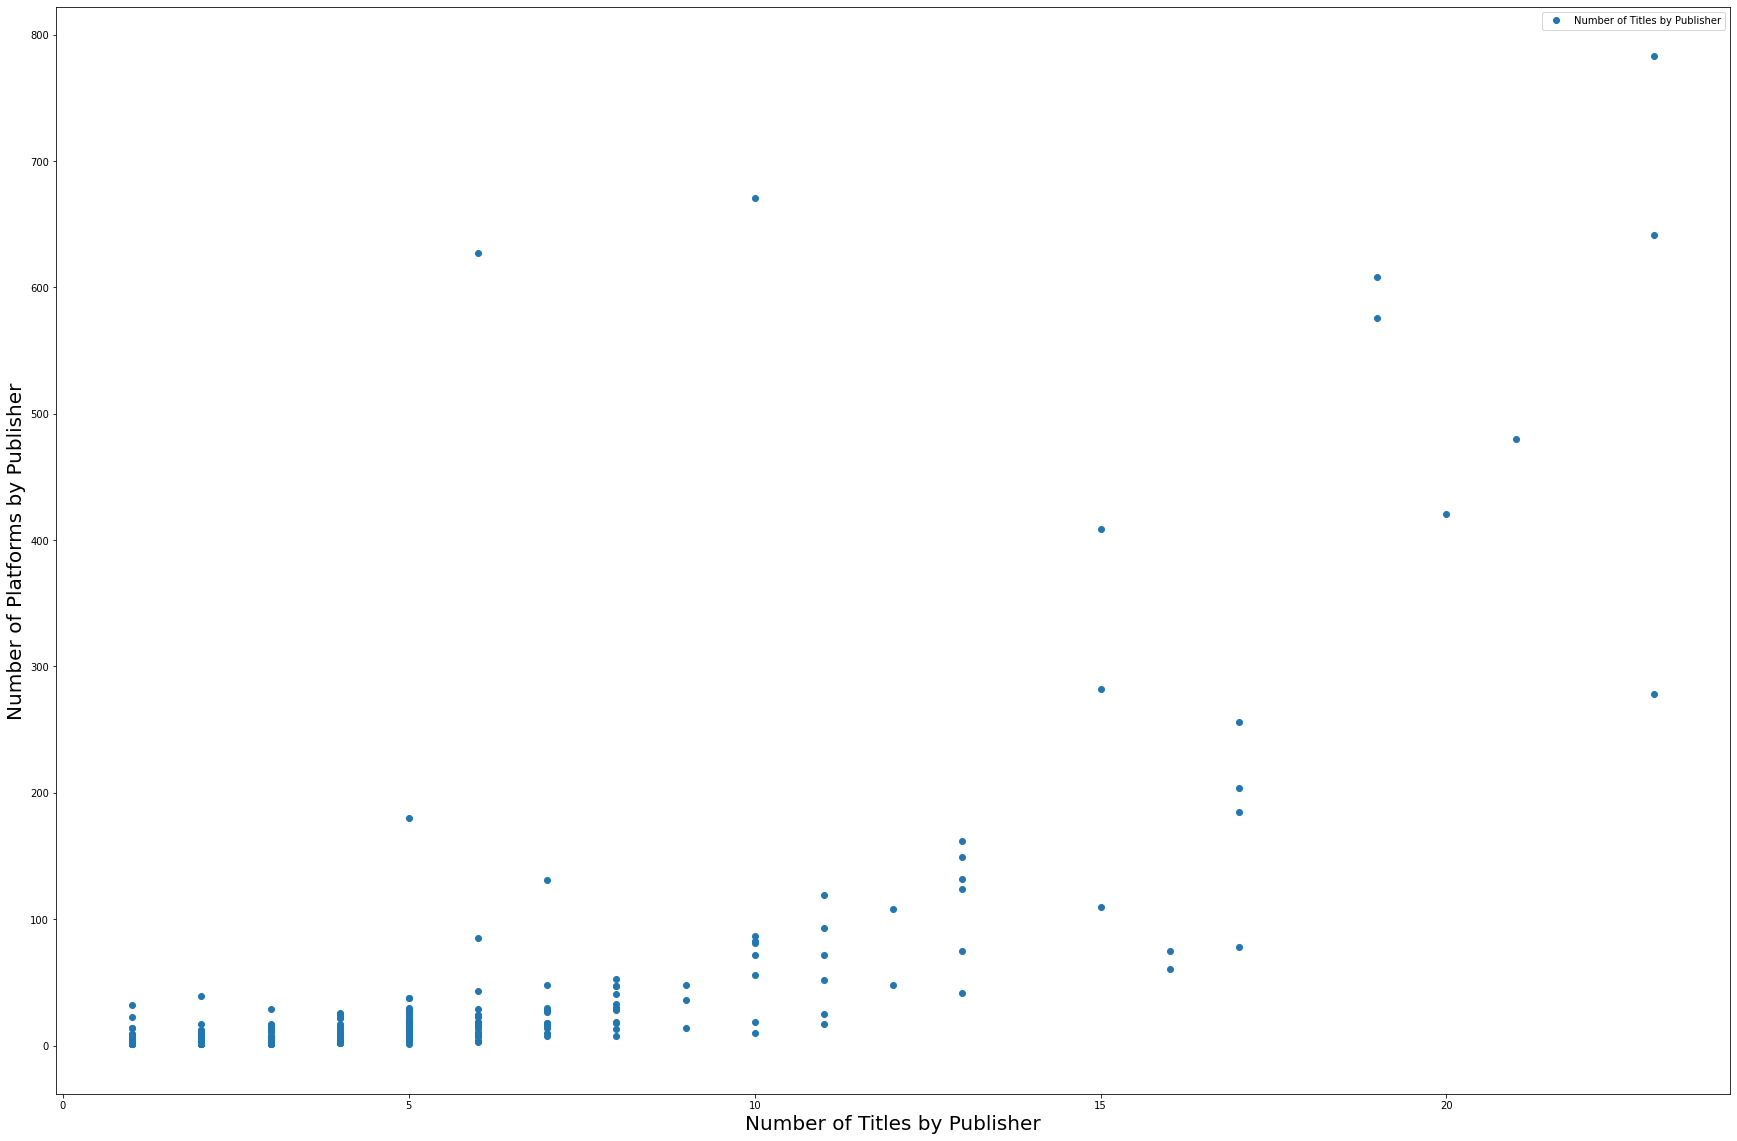

In [ ]:
# Plot the dataframe
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

df_3.plot(ax=ax, x='Number of Platforms by Publisher', y='Number of Titles by Publisher', style='o')
plt.xlabel('Number of Titles by Publisher', fontsize=20)
plt.ylabel('Number of Platforms by Publisher', fontsize=20)

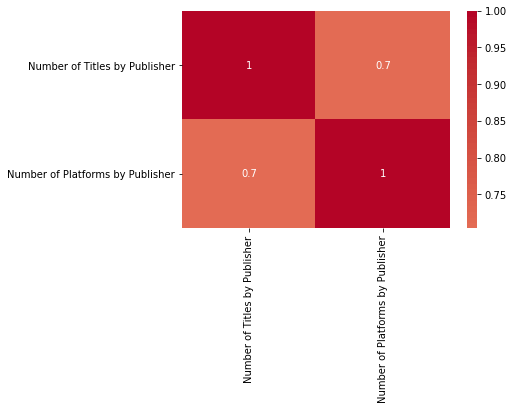

In [ ]:
# Get the corrrelation between number_of_titles_by_publisher and number_of_platforms_by_publisher
sns.heatmap(df_3.corr(), center=0, annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
# Linearize the above dataframe by taking the log of number_of_titles_by_publisher
linearized_3 = df_3
linearized_3['Number of Titles by Publisher'] = np.log(linearized_3['Number of Titles by Publisher'])

Text(0, 0.5, 'Number of Platforms by Publisher')

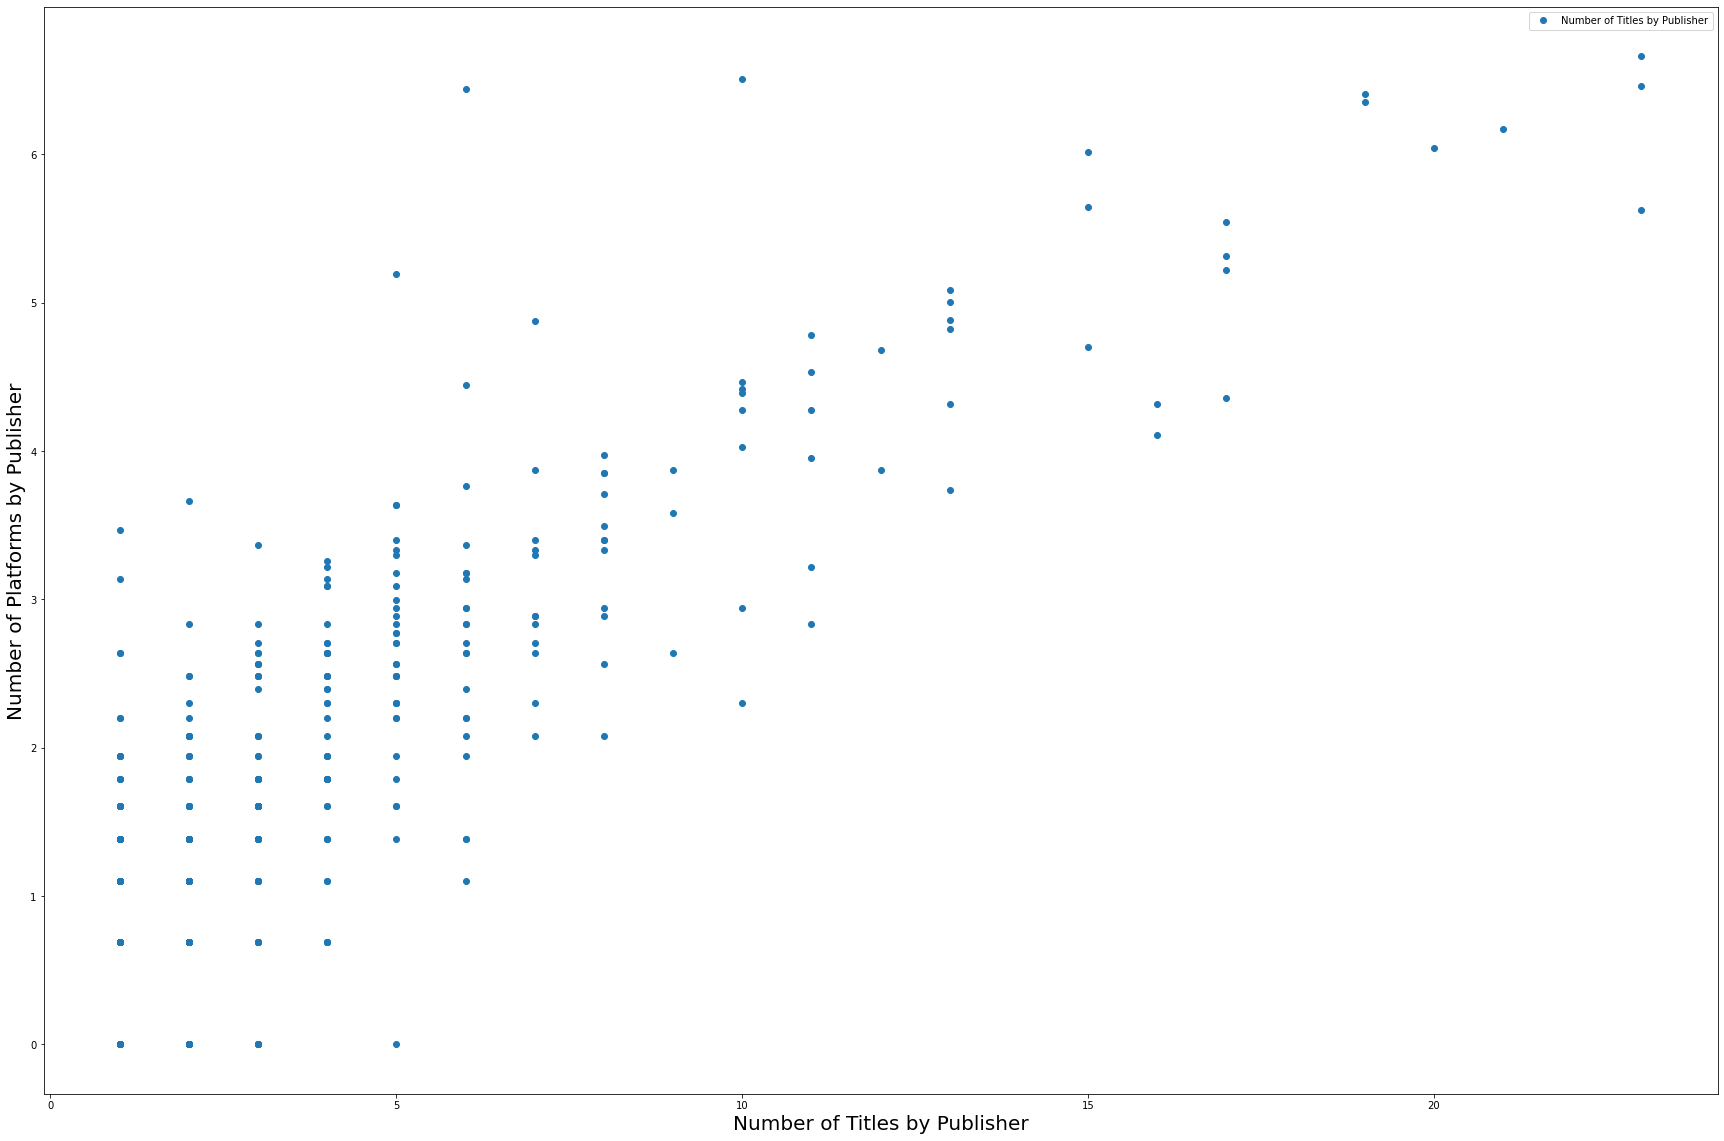

In [ ]:
# Plot the linearized dataframe
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

linearized_3.plot(ax=ax, x='Number of Platforms by Publisher', y='Number of Titles by Publisher', style='o')
plt.xlabel('Number of Titles by Publisher', fontsize=20)
plt.ylabel('Number of Platforms by Publisher', fontsize=20)

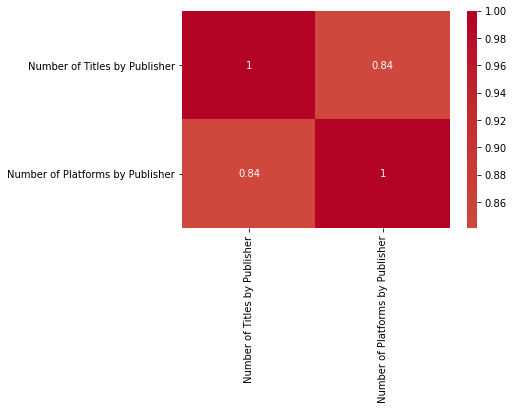

In [ ]:
# Get the correlation between number_of_platforms_by_publisher and log(number_of_titles_by_publisher)
sns.heatmap(linearized_3.corr(), center=0, annot = True, fmt='.2g',cmap= 'coolwarm')

# What is the best selling Platform in each Region?

In [ ]:
# Count how many millions of units of games are sold in North America by platform
# get the top 10 highest sales by platform.
NA_by_platform = data.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of NA Sales by Platform')
NA_by_platform = NA_by_platform[:10]
NA_by_platform

,Platform,Sum of NA Sales by Platform
0,X360,602.47
1,PS2,583.84
2,Wii,496.90
3,PS3,393.49
4,DS,382.67
5,PS,336.52
6,GBA,187.54
7,XB,186.69
8,N64,139.02
9,GC,133.46


In [ ]:
# Count how many millions of units of games are sold in Europe by platform
# get the top 10 highest sales by platform.
EU_by_platform = data.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of EU Sales by Platform')
EU_by_platform = EU_by_platform[:10]
EU_by_platform

,Platform,Sum of EU Sales by Platform
0,PS2,339.29
1,PS3,330.29
2,X360,270.76
3,Wii,262.21
4,PS,213.61
5,DS,188.89
6,PC,142.44
7,PS4,141.09
8,GBA,75.25
9,PSP,66.68


In [ ]:
# Count how many millions of units of games are sold in Japan by platform
# get the top 10 highest sales by platform.
JP_by_platform = data.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of JP Sales by Platform')
JP_by_platform = JP_by_platform[:10]
JP_by_platform

,Platform,Sum of JP Sales by Platform
0,DS,175.57
1,PS,139.82
2,PS2,139.20
3,SNES,116.55
4,3DS,100.67
5,NES,98.65
6,GB,85.12
7,PS3,80.19
8,PSP,76.78
9,Wii,69.33


In [ ]:
# Count how many millions of units of games are sold in other regions by platform
# get the top 10 highest sales by platform.
other_by_platform = data.groupby('Platform')['Other_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of Other Sales by Platform')
other_by_platform = other_by_platform[:10]
other_by_platform

,Platform,Sum of Other Sales by Platform
0,PS2,193.44
1,PS3,135.68
2,X360,85.76
3,Wii,79.07
4,DS,59.28
5,PS4,48.35
6,PSP,41.42
7,PS,40.91
8,PC,22.38
9,XOne,14.27


Text(0.5, 1.0, 'Sum of Other Sales by Platform')

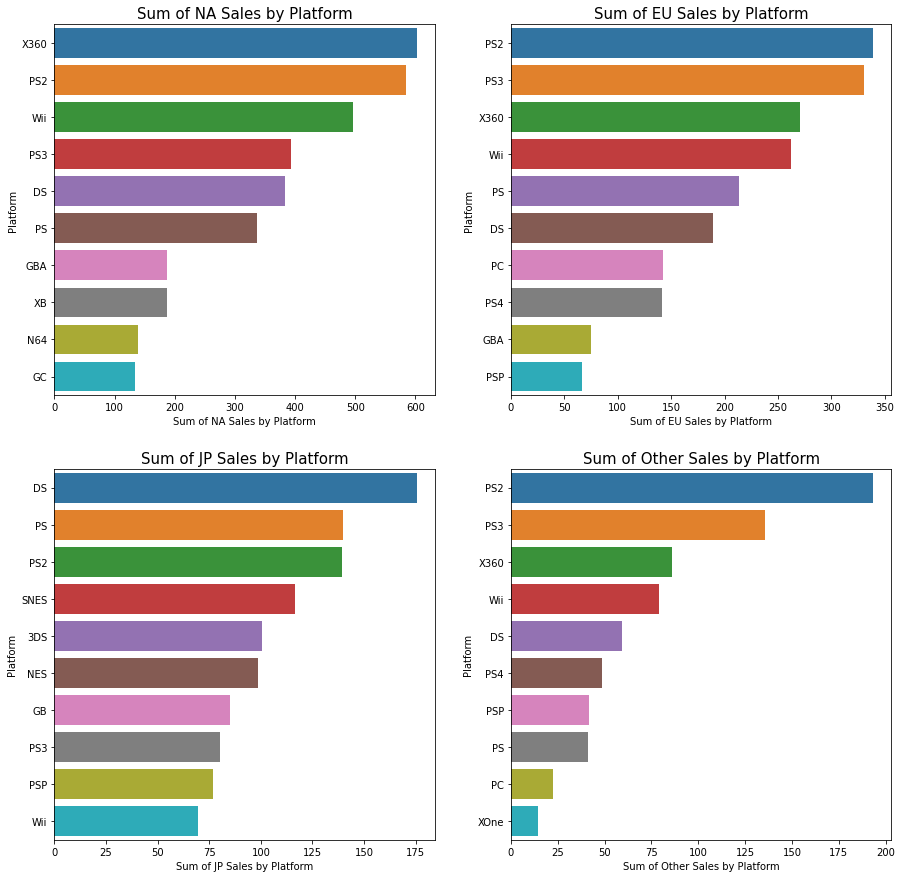

In [ ]:
# Plot all the above using bar graphs
fig, axs = plt.subplots(2, 2, figsize=(15,15))

NA_platform_plot = sns.barplot(ax=axs[0,0], y="Platform", x="Sum of NA Sales by Platform", orient="h", data=NA_by_platform)
axs[0, 0].set_title('Sum of NA Sales by Platform', fontsize=15)

EU_platform_plot = sns.barplot(ax=axs[0,1], y="Platform", x="Sum of EU Sales by Platform", orient="h", data=EU_by_platform)
axs[0, 1].set_title('Sum of EU Sales by Platform', fontsize=15)

JP_platform_plot = sns.barplot(ax=axs[1,0], y="Platform", x="Sum of JP Sales by Platform", orient="h", data=JP_by_platform)
axs[1, 0].set_title('Sum of JP Sales by Platform', fontsize=15)

Other_platform_plot = sns.barplot(ax=axs[1,1], y="Platform", x="Sum of Other Sales by Platform", orient="h", data=other_by_platform)
axs[1, 1].set_title('Sum of Other Sales by Platform', fontsize=15)

# What is the best selling Genre in each Region?

In [ ]:
# Count how many millions of units of games are sold in North America by genre
# get the top 10 highest sales by platform.
NA_by_genre = data.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of NA Sales by Genre')
NA_by_genre = NA_by_genre[:10]
NA_by_genre

,Genre,Sum of NA Sales by Genre
0,Action,879.01
1,Sports,684.43
2,Shooter,592.24
3,Platform,445.50
4,Misc,407.27
5,Racing,359.35
6,Role-Playing,330.81
7,Fighting,223.36
8,Simulation,182.19
9,Puzzle,122.87


In [ ]:
# Count how many millions of units of games are sold in Europe by genre
# get the top 10 highest sales by platform.
EU_by_genre = data.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of EU Sales by Genre')
EU_by_genre = EU_by_genre[:10]
EU_by_genre

,Genre,Sum of EU Sales by Genre
0,Action,519.13
1,Sports,376.79
2,Shooter,317.34
3,Racing,236.51
4,Misc,212.74
5,Platform,200.35
6,Role-Playing,188.71
7,Simulation,113.52
8,Fighting,100.33
9,Adventure,63.54


In [ ]:
# Count how many millions of units of games are sold in Japan by genre
# get the top 10 highest sales by platform.
JP_by_genre = data.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of JP Sales by Genre')
JP_by_genre = JP_by_genre[:10]
JP_by_genre

,Genre,Sum of JP Sales by Genre
0,Role-Playing,355.46
1,Action,161.44
2,Sports,135.54
3,Platform,130.83
4,Misc,108.11
5,Fighting,87.48
6,Simulation,63.80
7,Puzzle,57.31
8,Racing,56.71
9,Adventure,52.30


In [ ]:
# Count how many millions of units of games are sold in other regions by genre
# get the top 10 highest sales by platform.
other_by_genre = data.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of Other Sales by Genre')
other_by_genre = other_by_genre[:10]
other_by_genre

,Genre,Sum of Other Sales by Genre
0,Action,184.60
1,Sports,134.51
2,Shooter,104.11
3,Racing,76.10
4,Misc,74.39
5,Role-Playing,59.63
6,Platform,51.09
7,Fighting,36.36
8,Simulation,30.75
9,Adventure,16.49


Text(0.5, 1.0, 'Sum of Other Sales by Genre')

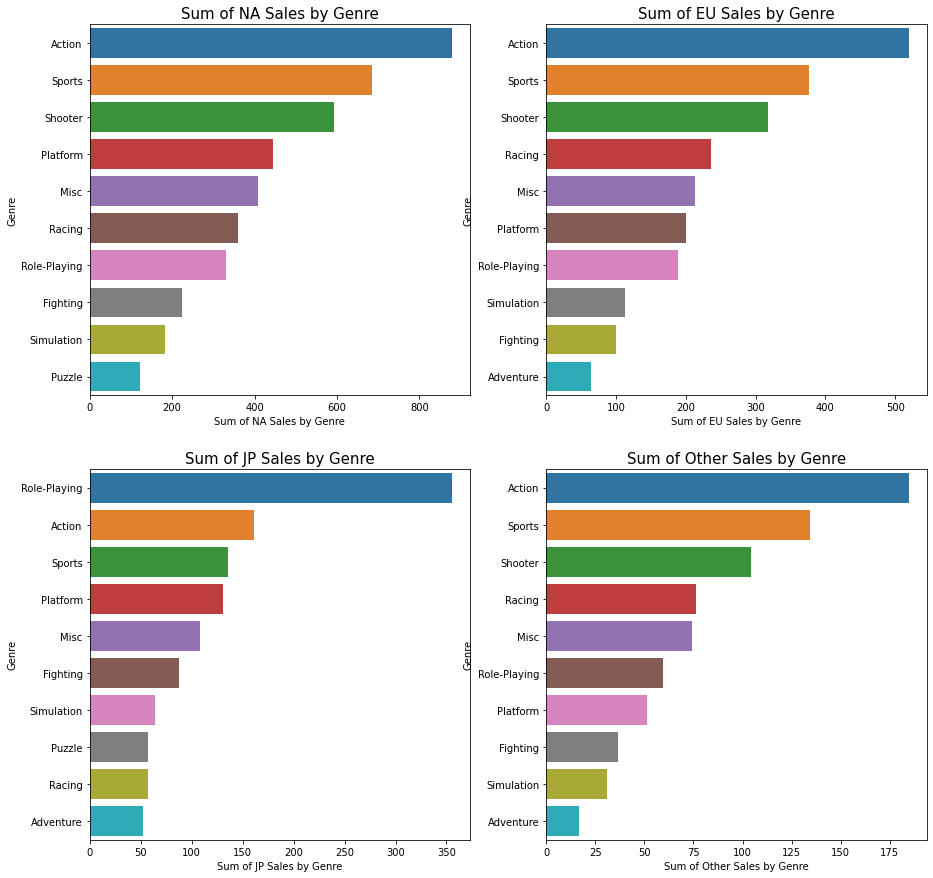

In [ ]:
# Plot all the above using bar graphs
fig, axs = plt.subplots(2, 2, figsize=(15,15))

NA_genre_plot = sns.barplot(ax=axs[0,0], y="Genre", x="Sum of NA Sales by Genre", orient="h", data=NA_by_genre)
axs[0, 0].set_title('Sum of NA Sales by Genre', fontsize=15)

EU_genre_plot = sns.barplot(ax=axs[0,1], y="Genre", x="Sum of EU Sales by Genre", orient="h", data=EU_by_genre)
axs[0, 1].set_title('Sum of EU Sales by Genre', fontsize=15)

JP_genre_plot = sns.barplot(ax=axs[1,0], y="Genre", x="Sum of JP Sales by Genre", orient="h", data=JP_by_genre)
axs[1, 0].set_title('Sum of JP Sales by Genre', fontsize=15)

Other_genre_plot = sns.barplot(ax=axs[1,1], y="Genre", x="Sum of Other Sales by Genre", orient="h", data=other_by_genre)
axs[1, 1].set_title('Sum of Other Sales by Genre', fontsize=15)

# Final Question
Independent Variables
* number_of_platforms_by_publisher
* number_of_titles_by_publisher

Dependent Variables
* Global_Sales

In [ ]:
# Create a new dataframe with publisher, log(global_sales_by_publisher), log(number_of_titles_by_publisher), 
# and number_of_platforms_by_publisher
df_4 = linearized_3.join(linearized['Sum of Global Sales by Publisher'])
df_4.head()

,Publisher,Number of Titles by Publisher,Number of Platforms by Publisher,Sum of Global Sales by Publisher
0,10TACLE Studios,1.098612,2,-2.207275
1,1C Company,1.098612,1,-2.302585
2,20th Century Fox Video Games,1.609438,1,0.662688
3,2D Boy,0.000000,1,-3.218876
4,3DO,3.401197,5,2.314514


In [ ]:
# The code below is based on https://stackoverflow.com/a/55369160/15043016
# This code calculate thre R-squared of the 3 numerical varibles

cor = df_4.corr()

# Independent Variables
x = 'Number of Titles by Publisher'
y = 'Number of Platforms by Publisher'

# Dependent Variables
z = 'Sum of Global Sales by Publisher'

# Pairings
xz = cor.loc[x, z]
yz = cor.loc[y, z]
xy = cor.loc[x, y]

Rxyz = math.sqrt((abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2)))
R2 = Rxyz**2

# Calculate adjusted R-squared
n = len(df_4) # Number of rows
k = 2         # Number of independent variables
R2_adj = 1 - (((1-R2)*(n-1)) / (n-k-1))

trunc_xz = round(xz * 100)
trunc_yz = round(yz * 100)
trunc_xy = round(xy * 100)
percentage = round(R2_adj * 100)

print('The correlation between the ' + x + ' and the log of the ' + z + ' is ' + str(trunc_xz) + '%')
print('The correlation between the ' + y + ' and the '            + z + ' is ' + str(trunc_yz) + '%')
print('The correlation between the ' + x + ' and the log of the ' + y + ' is ' + str(trunc_xy) + '%')
print('Results show that the log of the ' + z + ' is ' + str(percentage) + '% correlated with the ' + x)
print('\tand the log of the ' + y)

The correlation between the Number of Titles by Publisher and the log of the Sum of Global Sales by Publisher is 85%
The correlation between the Number of Platforms by Publisher and the Sum of Global Sales by Publisher is 76%
The correlation between the Number of Titles by Publisher and the log of the Number of Platforms by Publisher is 84%
Results show that the log of the Sum of Global Sales by Publisher is 73% correlated with the Number of Titles by Publisher
	and the log of the Number of Platforms by Publisher


# Linear Regression Models

In [ ]:
# The code below is based on: https://datatofish.com/multiple-linear-regression-python/
# this code trains a linear regression model with 3 vaaribles using the data in df_4

# here we have 2 variables for multiple regression. 
X = df_4[[x, y]]
Y = df_4[z]
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Number_of_Platforms = 10
New_Number_of_Titles = 10

p = regr.predict([[New_Number_of_Platforms, New_Number_of_Titles]])
prediction = round(p[0], ndigits=6)

print ('Predicted Global Sales (in millions of units): ' + str(prediction))

Intercept: 
 -2.6811480609181553
Coefficients: 
 [1.13610227 0.088456  ]
Predicted Global Sales (in millions of units): 9.564435


In [ ]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                                   OLS Regression Results                                   
Dep. Variable:     Sum of Global Sales by Publisher   R-squared:                       0.735
Model:                                          OLS   Adj. R-squared:                  0.734
Method:                               Least Squares   F-statistic:                     801.0
Date:                              Wed, 02 Jun 2021   Prob (F-statistic):          2.44e-167
Time:                                      07:16:45   Log-Likelihood:                -915.55
No. Observations:                               581   AIC:                             1837.
Df Residuals:                                   578   BIC:                             1850.
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
                                       coef    std err          t     